# Predicting heart disease using machine learning

# preparing the tools

In [1]:
# import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import precision_score , f1_score , recall_score
from sklearn.metrics import RocCurveDisplay

# Load the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows , columns)

(303, 14)

# Data Exploration (exploratory data analysis or EDA)


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


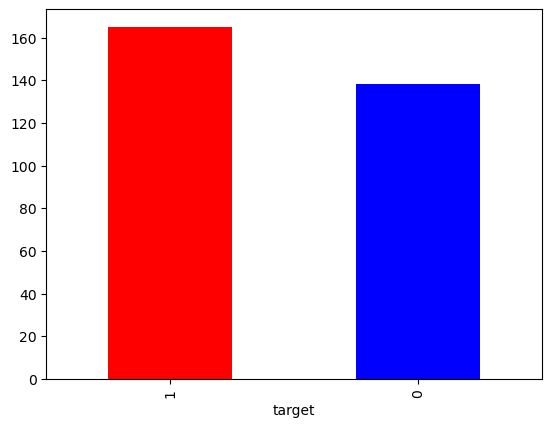

In [4]:
# Let's find out how many of each class there
df.target.value_counts().plot(kind = "bar" , color = ["red","blue"])
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency according to Sex

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Compare target column with sex column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


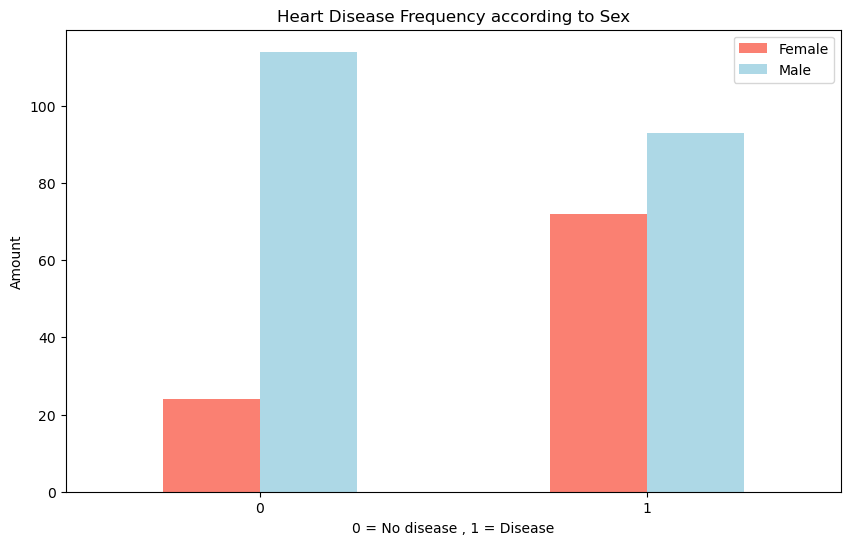

In [10]:
# Create a plot crosstab
pd.crosstab(df.target , df.sex).plot(kind = "bar",
                                    figsize = (10,6),
                                    color = ["salmon","lightblue"])
plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("0 = No disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

# Age VS Max heart rate for Heart Disease

In [11]:
df.age[df.target == 1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

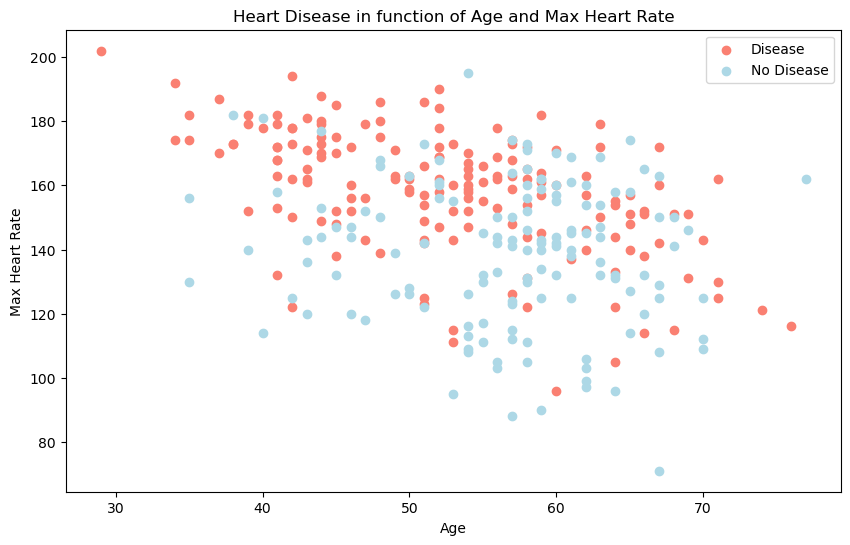

In [12]:
# Creating another figure
plt.figure(figsize = (10,6))

# scatter with positive example
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = ["salmon"])
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = ["lightblue"])

# Add some helpfull info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

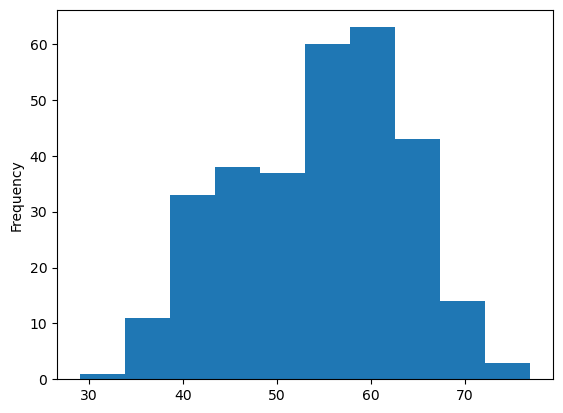

In [13]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()
plt.show()

## Heart Disease Frequency Per Chest Pain Type

In [14]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


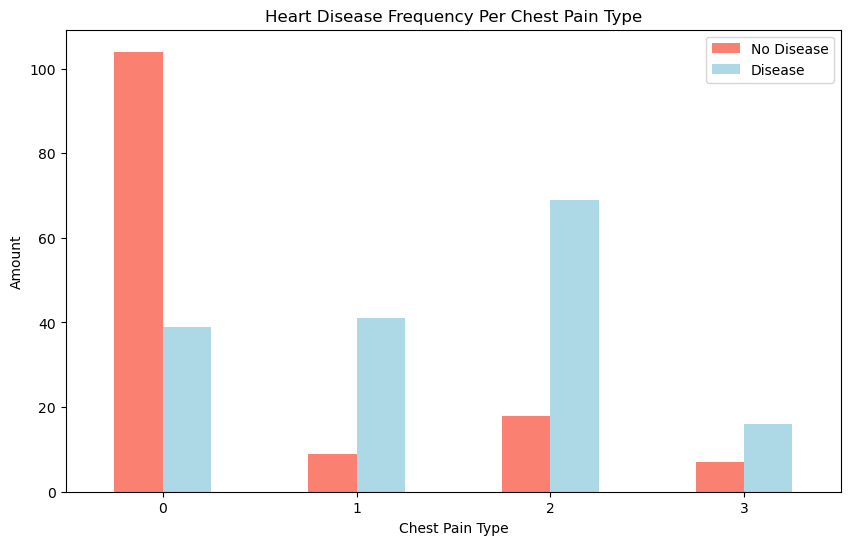

In [15]:
# Make the cross tab visual 
pd.crosstab(df.cp , df.target).plot(kind = "bar", color = ["salmon","lightblue"],figsize = (10,6))

# Add some communnication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0)
plt.show()

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Make a co relation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


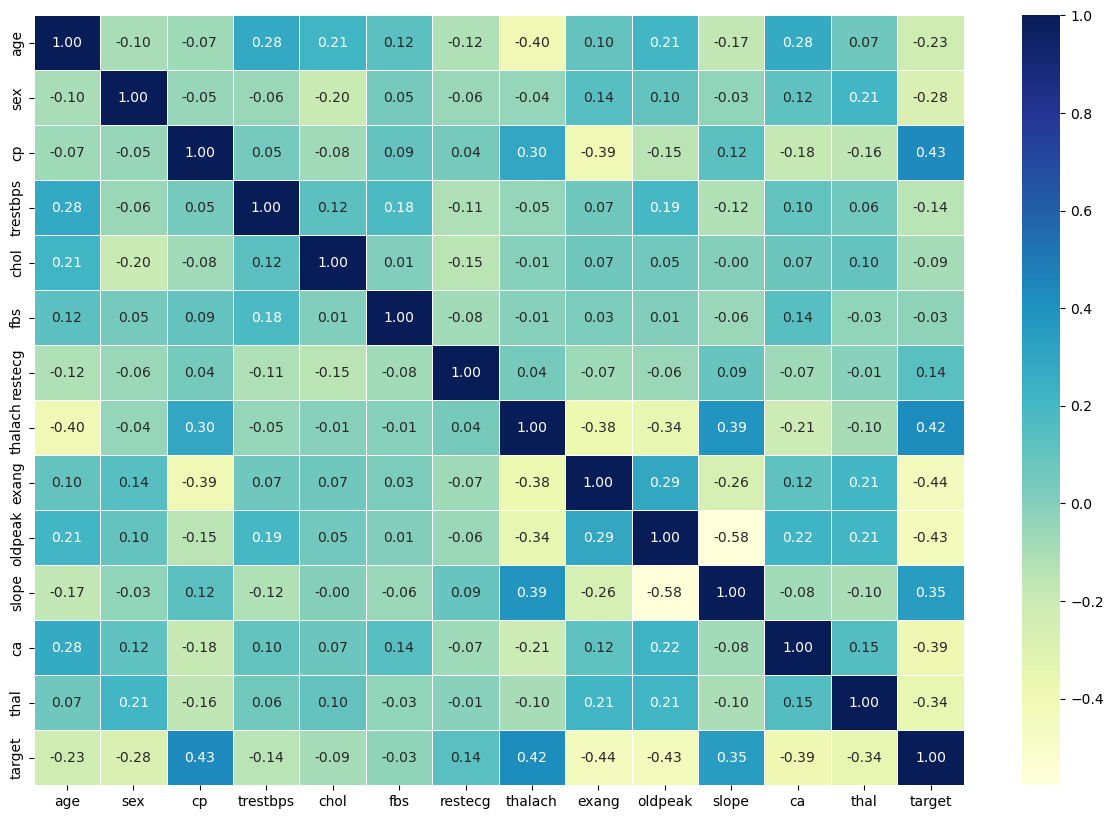

In [18]:
# Let's make our co relational matrix little bit prettier
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix ,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu")
plt.show()

In [19]:
df.oldpeak.value_counts()

oldpeak
0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: count, dtype: int64

## 5. Modelling

In [20]:
# Split the data into X and y
X = df.drop("target",axis = 1)
y = df["target"]

In [21]:
# Split the data into train and test
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2)

In [22]:
# Put the models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

# Create a function to fit and score the model
def fit_and_score(models, X_train,X_test,y_train,y_test):
    np.random.seed(42)
    # Make the dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name , model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [23]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

C:\Users\Public\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparision

In [24]:
model_compare = pd.DataFrame(model_scores , index = ["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


In [25]:
model_compare.T

,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


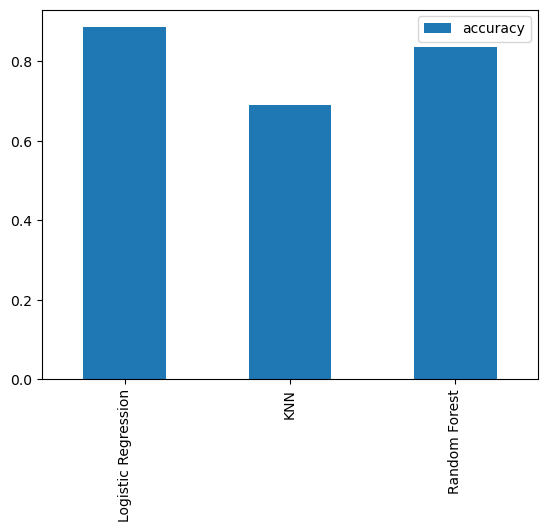

In [26]:
model_compare.T.plot(kind = "bar")
plt.show()

## Hyper Parameter tunning

In [27]:
# let's tune KNN

train_score = []
test_score = []

# create a list of different values for n_neighbours
neighbors = range(1,21)

# set up KNN instance 
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the model 
    knn.fit(X_train,y_train)

    # Update the training_score list
    train_score.append(knn.score(X_train,y_train))

    # Update the test_score list
    test_score.append(knn.score(X_test,y_test))
    

In [28]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

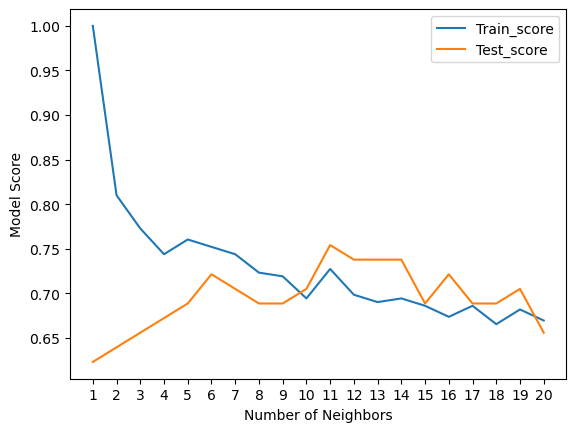

Maximum score of KNN model is 75.41%


In [30]:
plt.plot(neighbors , train_score ,label = "Train_score")
plt.plot(neighbors , test_score , label = "Test_score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.show()

print(f"Maximum score of KNN model is {max(test_score)*100:.2f}%")

## Hyperparameter Tuning with RandamizedSearchCV

In [31]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                    "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None , 3, 5, 10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [32]:
# Tune LogisticRegression

np.random.seed(42)

#set up Random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression() ,
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit the Random hyperparameter search for Logistc Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [35]:
# Set up the seed
np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

# Fit 
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
# Evaluate the Randamized Search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [38]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tuning using GridSearchCV

In [39]:
# Different hyperparameters for LogisticRegression model 
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

# Fit 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
# Check the best hyperparameter 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
# Evaluate
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy


In [42]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [43]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

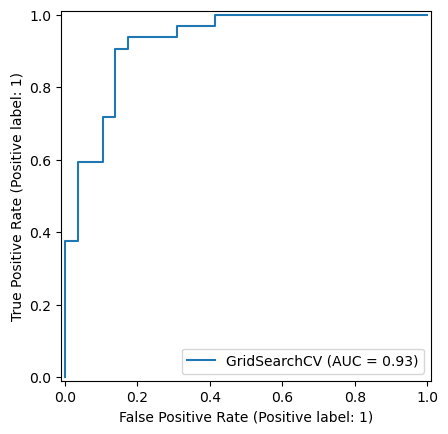

In [45]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)
plt.show()

In [46]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


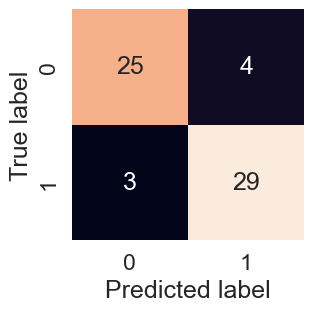

In [47]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    plt.show()
    
plot_conf_mat(y_test, y_preds)

In [48]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [49]:
# Calculate Evaluation metrics using cross-validation
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Create a new parameter with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")


In [51]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [52]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [53]:
# cross validated precision
cv_pre = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring = "precision")
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [54]:
cv_pre = np.mean(cv_pre)
cv_pre


0.8207936507936507

In [55]:
# cross validation for recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [56]:
# cross validated for f1 score
cv_f1_score = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring = "f1")
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

In [57]:
# Visualize cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_recall,
                         "F1_score":cv_f1_score},
                         index = [0])
cv_metrics

,Accuracy,Precision,Recall,F1_score
0,0.844699,0.820794,0.921212,0.867301


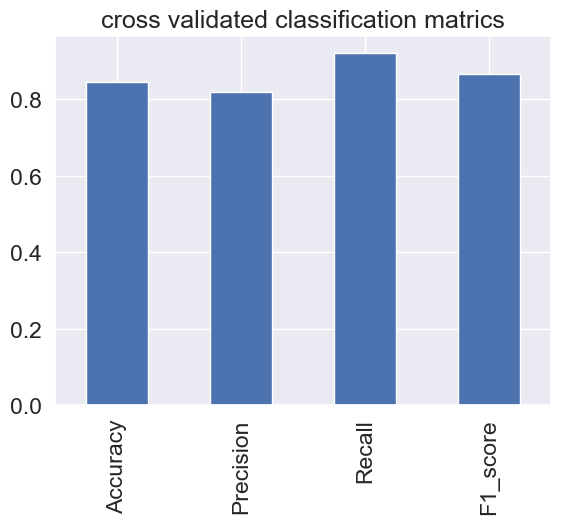

In [58]:
cv_metrics.T.plot(kind = "bar",title = "cross validated classification matrics",legend = False)
plt.show()

# Feature Importance 

In [63]:
# Fit an instance of Logistic Regression
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
# Check coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [68]:
# Match the coef's features to column
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

In [72]:
clf.coef_[0]

array([ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
        0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
        0.45051617, -0.63609863, -0.67663375])

In [76]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860446,0.660671,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.60413,-0.568629,0.450516,-0.636099,-0.676634


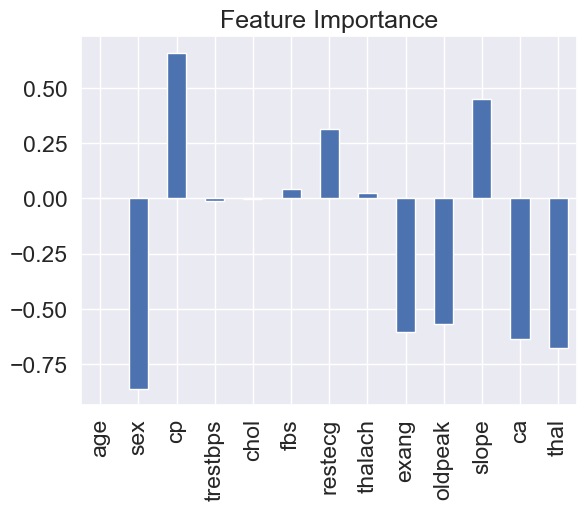

In [83]:
feature_df.T.plot(kind = "bar",title = "Feature Importance",legend = False)
plt.show()

In [84]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [85]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
